# Simulation Result Analysis

In this notebook, $^{26}Al$ activity radial trend in the Knyahinya meteorite (please refer to [Leya et al., 2021](https://iopscience.iop.org/article/10.3847/1538-4357/abe52f), and [Graf et al., 1990](https://www.sciencedirect.com/science/article/abs/pii/001670379090238G))  is directly determined from the simulaiton output [root](https://root.cern.ch/) files.

In [1]:
# Imports
import uproot            as root
import matplotlib.pyplot as plt
import numpy             as np

In [2]:
# Open root file
file = root.open("./Shielding_Knyahinya_M600.root")
print(file.classnames())

{'0;1': 'TH1D', '1;1': 'TH1D'}


The file contains two histrograms of type TH1D, the first related to the values in the histograms, while the second with the errors.

Let's extract the content of the root file.

In [3]:
edges  = file["0"].axis().edges() # Edges of the histogram
values = file["0"].values()       # Values in the histogram
erros  = file["1"].errors()       # Errors of the values

# Extract mid points of histogram
depth = (edges[1:] + edges[:len(edges)-1])/2

## Plot of the results

In the following plot, the result extracted from the root file are shown.

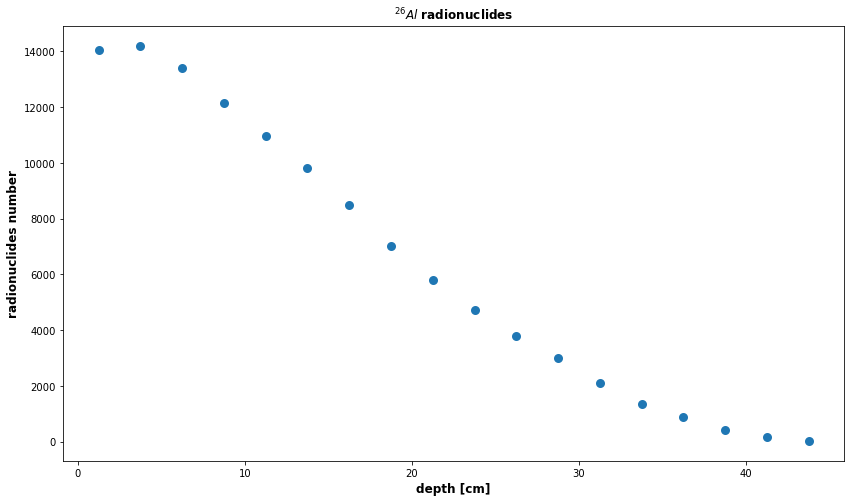

In [4]:
fontsize = 12
weight   = 'bold'

plt.figure(figsize=(14, 8))
plt.scatter(x=depth, y=values, linewidth=3)
plt.xlabel('depth [cm]',             weight=weight, fontsize=fontsize)
plt.ylabel('radionuclides number',   weight=weight, fontsize=fontsize)
plt.title('$^{26}Al$ radionuclides', weight=weight, fontsize=fontsize)
plt.show()

## Radioactivity trend plot

In order to determine the radioactivity radial trend in the meteorite, we need to introduce the time of simulation, which means the fraction of the GCR simulated, and the meteprite mass portion in which the activity is considered (in order to obtain the dpm/kg).

In [5]:
# Useful data
simulated_flux_fraction = 0.6  # s
meteoriteRadius         = 45   # cm
meteoriteDensity        = 3.49 # g/cm3

# Calculate the mass of the spherical shells in which the radionuclides lay
sphere_volumes          = 4/3 * np.pi * (meteoriteRadius-edges)*(meteoriteRadius-edges)*(meteoriteRadius-edges) # cm3
shperical_shell_masses  = -np.diff(sphere_volumes)*meteoriteDensity/1000 # kg

# Activity
activity = np.divide(values, shperical_shell_masses)*simulated_flux_fraction


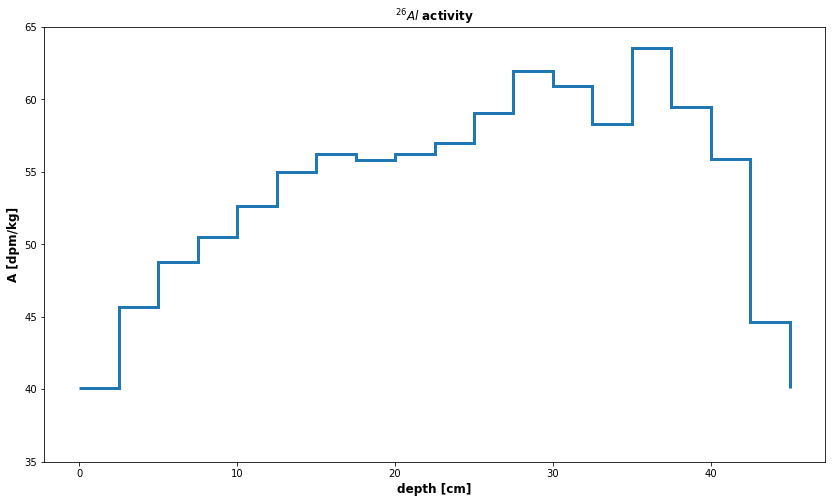

In [6]:
plt.figure(figsize=(14, 8))
plt.stairs(values=activity, edges=edges, baseline=np.min(activity), linewidth=3)
plt.xlabel('depth [cm]',        weight=weight, fontsize=fontsize)
plt.ylabel('A [dpm/kg]',        weight=weight, fontsize=fontsize)
plt.ylim([35, 65])
plt.title('$^{26}Al$ activity', weight=weight, fontsize=fontsize)
plt.show()